https://blog.csdn.net/weixin_41712499/article/details/82875574

# Normalization(正则化、规范化) and Scaler(归一化) 

normalizer主要用于样本；

scaler 主要用于特征

正则化的过程是将每个样本缩放到单位范数（每个样本的范数为1），如果后面要使用如二次型（点积）或者其它核方法计算两个样本之间的相似性这个方法会很有用。

对于两个TF-IDF向量的l2-norm进行点积，就可以得到这两个向量的余弦相似性。

Normalization主要思想是对每个样本计算其p-范数，然后对该样本中每个元素除以该范数，这样处理的结果是使得每个处理后样本的p-范数（l1-norm,l2-norm）等于1。

## 补充

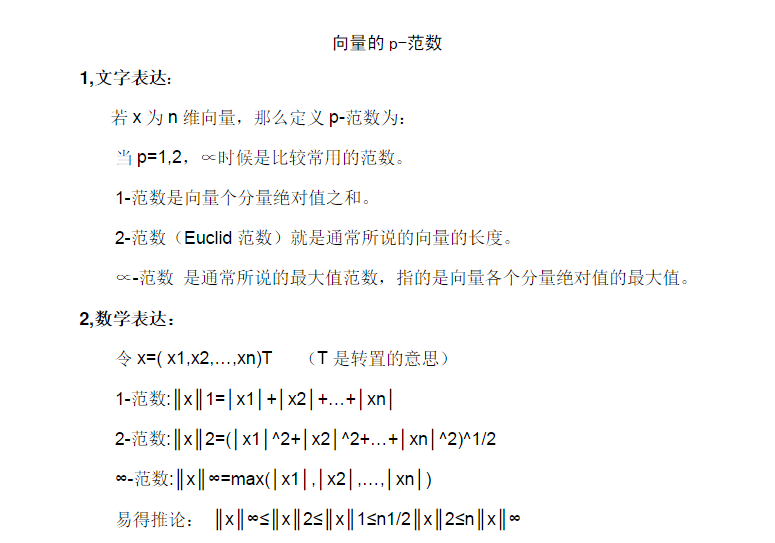

In [4]:
import numpy as np
x = np.arange(-4, 5).reshape((3, 3))
x

array([[-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4]])

## Normalization

In [22]:
from sklearn.preprocessing import Normalizer

In [26]:
normalizer = Normalizer(norm='l2')

In [27]:
normalizer.fit(x)

Normalizer(copy=True, norm='l2')

In [28]:
normalizer.transform(x)

array([[-0.74278135, -0.55708601, -0.37139068],
       [-0.70710678,  0.        ,  0.70710678],
       [ 0.37139068,  0.55708601,  0.74278135]])

In [3]:
from sklearn.preprocessing import normalize

### 最大值置为1（除以最大值）

In [9]:
normalize(x, 'max')

array([[ 2.  ,  1.5 ,  1.  ],
       [-1.  ,  0.  ,  1.  ],
       [ 0.5 ,  0.75,  1.  ]])

In [10]:
normalize(x, 'max', axis=0)

array([[-2.  , -1.  , -0.5 ],
       [-0.5 ,  0.  ,  0.25],
       [ 1.  ,  1.  ,  1.  ]])

### 向量的1范数：元素绝对值和为1

In [11]:
normalize(x, 'l1', axis=0)

array([[-0.57142857, -0.5       , -0.28571429],
       [-0.14285714,  0.        ,  0.14285714],
       [ 0.28571429,  0.5       ,  0.57142857]])

### 向量的2范数：元素平方和为1

In [12]:
normalize(x, 'l2', axis=0)

array([[-0.87287156, -0.70710678, -0.43643578],
       [-0.21821789,  0.        ,  0.21821789],
       [ 0.43643578,  0.70710678,  0.87287156]])

## Scaler(归一化)

### StandardScaler：Z-Score标准化: 均值为0，方差为1
Z-Score通过（x-μ）/σ将两组或多组数据转化为无单位的Z-Score分值，使得数据标准统一化，提高了数据可比性，削弱了数据解释性。

公式为：(X-mean)/std  计算时对每个属性/每列分别进行。

将数据按期属性（按列进行）减去其均值，并处以其方差。得到的结果是，对于每个属性/每列来说所有数据都聚集在0附近，方差为1。

实现时，有两种不同的方式：

使用sklearn.preprocessing.StandardScaler类，使用该类的好处在于可以保存训练集中的参数（均值、方差）直接使用其对象转换测试集数据。

In [8]:
x

array([[-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4]])

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)

In [7]:
scaler.mean_

array([-1.,  0.,  1.])

In [9]:
scaler.scale_

array([2.44948974, 2.44948974, 2.44948974])

In [11]:
# 方差
scaler.var_

array([6., 6., 6.])

In [12]:
scaler.transform(x)

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.22474487, -1.22474487, -1.22474487],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.22474487,  1.22474487,  1.22474487]])

使用sklearn.preprocessing.scale()函数，可以直接将给定数据进行标准化。

In [14]:
from sklearn.preprocessing import scale

In [15]:
scale(x)

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([[-1.22474487, -1.22474487, -1.22474487],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.22474487,  1.22474487,  1.22474487]])

### MinMaxScaler
除了上述介绍的方法之外，另一种常用的方法是将属性缩放到一个指定的最大和最小值（通常是1-0）之间，这可以通过preprocessing.MinMaxScaler类实现。

使用这种方法的目的包括：

1、对于方差非常小的属性可以增强其稳定性。

2、维持稀疏矩阵中为0的条目。

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(x)

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [20]:
# 原始的每个特征值范围
scaler.data_range_

array([6., 6., 6.])

In [21]:
scaler.transform(x)

array([[0. , 0. , 0. ],
       [0.5, 0.5, 0.5],
       [1. , 1. , 1. ]])